In [144]:

from datetime import datetime, date, timedelta
from IPython.display import display, clear_output
import time
from array import *
import numpy as np
import gc
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
from pylab import savefig
import seaborn as sns
import pandas as pd
import csv
import json
import math
import datetime as dt
import pymongo as pym


# %%
myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["AllAppsSSDsLocation"]
mycol = mydb["all_apps_s_s_ds_location"]

myqueryAllAppsSSDsLocation = { "model_y": { "$eq": "B2" }}
myfieldsAllAppsSSDsLocation = {"disk_id":1, "model_y":1, "app":1, "_id":0}

mydocAllAppsSSDsLocation = mycol.find(myqueryAllAppsSSDsLocation, myfieldsAllAppsSSDsLocation)


myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["SMARTAttributesFilterOverWear"]
mycol = mydb["s_m_a_r_t_att_over_wear"]

myquerySMARTAtt = { "model_x": { "$eq": "MB2" }}
myfieldsSMARTAtt = {"disk_id":1, "r_sectors":1, "w_r_d":1, "_id":0}

mydocSMARTAtt = mycol.find(myquerySMARTAtt, myfieldsSMARTAtt)

# %%
listAllAppsSSDsLocation = list(mydocAllAppsSSDsLocation)
dfAllAppsSSDsLocation =  pd.DataFrame(listAllAppsSSDsLocation)

listSMARTAtt = list(mydocSMARTAtt)
dfSMARTAtt =  pd.DataFrame(listSMARTAtt)

# %%
dfSMARTAtt["model_y"] = "B2"

# %%
result = pd.merge(dfSMARTAtt, dfAllAppsSSDsLocation[['disk_id', 'model_y', 'app']], on=['disk_id', 'model_y'], how='inner')

# %%
#result.drop(result[result.w_r_d > 1500].index, inplace=True)
result.drop(result[result.r_sectors < 10].index, inplace=True)

# %%
maxWearValue = result["w_r_d"].max()

[Text(0.5, 0, 'wear leveling'),
 Text(0, 0.5, 'reallocated sectors'),
 Text(0.5, 1.0, 'B2 SSD Model')]

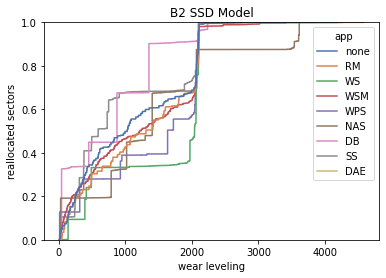

In [152]:
graph = sns.ecdfplot(x = "r_sectors", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel ="wear leveling", ylabel = "reallocated sectors", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


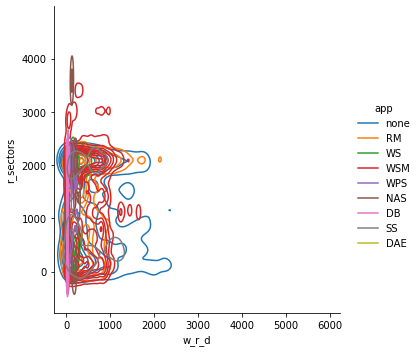

In [147]:
sns.displot(result, x="w_r_d", y="r_sectors", hue="app", kind="kde")

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='w_r_d', ylabel='Density'>

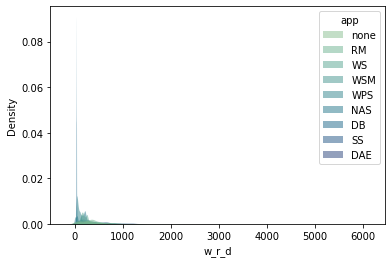

In [148]:
sns.kdeplot(
   data=result, x="w_r_d", hue="app",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='w_r_d', ylabel='r_sectors'>

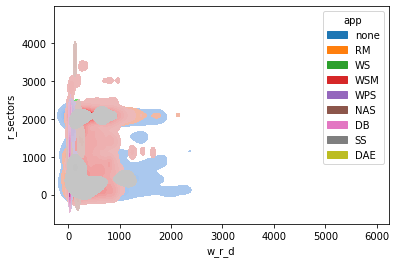

In [149]:
sns.kdeplot(
    data=result, x="w_r_d", y="r_sectors", hue="app", fill=True,
)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='r_sectors', ylabel='Density'>

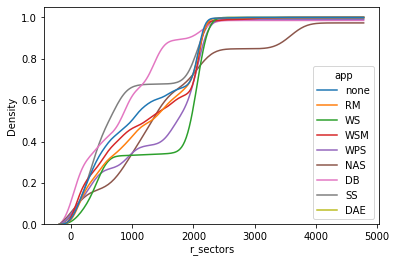

In [153]:
sns.kdeplot(
    data=result, x="w_r_d", y="r_sectors", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)